# MuseGAN Training

## imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import types

from models.MuseGAN import MuseGAN
from utils.loaders import load_music


from music21 import midi
from music21 import note, stream, duration



Using TensorFlow backend.


In [2]:
# run params
SECTION = 'compose'
RUN_ID = '0017'
DATA_NAME = 'chorales'
FILENAME = 'Jsb16thSeparated.npz'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])



if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))
    os.mkdir(os.path.join(RUN_FOLDER, 'samples'))

mode =  'build' # ' 'load' # 

## data

In [3]:
BATCH_SIZE = 64
n_bars = 2
n_steps_per_bar = 16
n_pitches = 84
n_tracks = 4

data_binary, data_ints, raw_data = load_music(DATA_NAME, FILENAME, n_bars, n_steps_per_bar)
data_binary = np.squeeze(data_binary)

## architecture

In [4]:
gan = MuseGAN(input_dim = data_binary.shape[1:]
        , critic_learning_rate = 0.001
        , generator_learning_rate = 0.001
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 32
        , batch_size = BATCH_SIZE
        , n_tracks = n_tracks
        , n_bars = n_bars
        , n_steps_per_bar = n_steps_per_bar
        , n_pitches = n_pitches
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:                 
    gan.load_weights(RUN_FOLDER)

In [5]:
gan.chords_tempNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
temporal_input (InputLayer)  (None, 32)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2, 1, 1024)        66560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 1, 1024)        4096      
_________________________________________________________________
activation_1 (Activation)    (None, 2, 1, 1024)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 2, 1, 32)          32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 1, 32)          128       
__________

In [6]:
gan.barGen[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bar_generator_input (InputLa (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_11 (Activation)   (None, 1024)              0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 2, 1, 512)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 4, 1, 512)         524800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 1, 512)         2048      
__________

In [7]:
gan.generator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
melody_input (InputLayer)       (None, 4, 32)        0                                            
__________________________________________________________________________________________________
chords_input (InputLayer)       (None, 32)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_3 (

In [22]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 2, 16, 84, 4)      0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 16, 84, 128)    1152      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 16, 84, 128)    16512     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 16, 7, 128)     196736    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 16, 7, 128)     0         
__________

## training

In [9]:

EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 10

gan.epoch = 0

In [ ]:
gan.train(     
    data_binary
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

6026 (5, 1) [D loss: (-28.5)(R -43.2, F 2.7, G 1.2)] [G loss: -3.1]
6027 (5, 1) [D loss: (-28.1)(R -40.2, F 3.2, G 0.9)] [G loss: -2.4]
6028 (5, 1) [D loss: (-27.6)(R -44.7, F 4.3, G 1.3)] [G loss: -2.4]
6029 (5, 1) [D loss: (-28.4)(R -39.3, F 1.6, G 0.9)] [G loss: -2.5]
6030 (5, 1) [D loss: (-27.8)(R -43.9, F 6.1, G 1.0)] [G loss: -2.8]
6031 (5, 1) [D loss: (-28.8)(R -38.9, F 2.3, G 0.8)] [G loss: -2.3]
6032 (5, 1) [D loss: (-27.6)(R -42.6, F 2.3, G 1.3)] [G loss: 0.4]
6033 (5, 1) [D loss: (-28.6)(R -40.3, F 2.4, G 0.9)] [G loss: -3.5]
6034 (5, 1) [D loss: (-27.4)(R -38.2, F 2.0, G 0.9)] [G loss: -1.4]
6035 (5, 1) [D loss: (-29.4)(R -40.4, F 2.8, G 0.8)] [G loss: -4.5]
6036 (5, 1) [D loss: (-28.4)(R -46.4, F 3.9, G 1.4)] [G loss: -3.3]
6037 (5, 1) [D loss: (-28.2)(R -42.0, F 2.6, G 1.1)] [G loss: -2.3]
6038 (5, 1) [D loss: (-27.3)(R -40.6, F 2.9, G 1.0)] [G loss: -2.9]
6039 (5, 1) [D loss: (-28.6)(R -43.7, F 4.8, G 1.0)] [G loss: -1.0]
6040 (5, 1) [D loss: (-28.5)(R -39.7, F 2.9, G 0.

6147 (5, 1) [D loss: (-28.7)(R -41.0, F 3.6, G 0.9)] [G loss: -3.9]
6148 (5, 1) [D loss: (-28.3)(R -38.8, F 2.8, G 0.8)] [G loss: -3.8]
6149 (5, 1) [D loss: (-28.1)(R -38.5, F 0.8, G 1.0)] [G loss: -3.7]
6150 (5, 1) [D loss: (-26.5)(R -48.0, F 6.2, G 1.5)] [G loss: -1.4]
6151 (5, 1) [D loss: (-28.0)(R -43.1, F 3.7, G 1.1)] [G loss: -0.8]
6152 (5, 1) [D loss: (-28.2)(R -45.5, F 5.1, G 1.2)] [G loss: -2.0]
6153 (5, 1) [D loss: (-28.6)(R -37.5, F 0.8, G 0.8)] [G loss: -2.5]
6154 (5, 1) [D loss: (-27.6)(R -45.0, F 6.6, G 1.1)] [G loss: -2.6]
6155 (5, 1) [D loss: (-27.9)(R -37.3, F 2.6, G 0.7)] [G loss: -2.4]
6156 (5, 1) [D loss: (-28.5)(R -42.7, F 3.8, G 1.0)] [G loss: -4.2]
6157 (5, 1) [D loss: (-27.9)(R -41.4, F 4.4, G 0.9)] [G loss: -5.7]
6158 (5, 1) [D loss: (-28.5)(R -40.4, F 2.6, G 0.9)] [G loss: -4.0]
6159 (5, 1) [D loss: (-28.5)(R -43.2, F 3.9, G 1.1)] [G loss: -0.3]
6160 (5, 1) [D loss: (-27.2)(R -41.7, F 4.3, G 1.0)] [G loss: -1.7]
6161 (5, 1) [D loss: (-29.1)(R -43.5, F 2.8, G 1

6268 (5, 1) [D loss: (-27.3)(R -42.8, F 3.3, G 1.2)] [G loss: -2.7]
6269 (5, 1) [D loss: (-28.6)(R -37.0, F 1.6, G 0.7)] [G loss: -2.6]
6270 (5, 1) [D loss: (-28.9)(R -41.7, F 2.3, G 1.0)] [G loss: -3.2]
6271 (5, 1) [D loss: (-28.0)(R -43.8, F 4.5, G 1.1)] [G loss: -2.5]
6272 (5, 1) [D loss: (-27.0)(R -43.2, F 5.5, G 1.1)] [G loss: -3.3]
6273 (5, 1) [D loss: (-28.6)(R -40.2, F 2.8, G 0.9)] [G loss: -0.9]
6274 (5, 1) [D loss: (-28.3)(R -39.4, F 2.5, G 0.9)] [G loss: -3.1]
6275 (5, 1) [D loss: (-27.7)(R -37.4, F 1.0, G 0.9)] [G loss: -4.8]
6276 (5, 1) [D loss: (-29.5)(R -44.6, F 4.0, G 1.1)] [G loss: -4.3]
6277 (5, 1) [D loss: (-28.3)(R -40.1, F 4.0, G 0.8)] [G loss: -2.5]
6278 (5, 1) [D loss: (-29.6)(R -41.5, F 2.4, G 1.0)] [G loss: -4.0]
6279 (5, 1) [D loss: (-29.1)(R -40.7, F 1.6, G 1.0)] [G loss: -3.2]
6280 (5, 1) [D loss: (-27.4)(R -40.2, F 1.6, G 1.1)] [G loss: -0.6]
6281 (5, 1) [D loss: (-27.9)(R -40.7, F 3.4, G 0.9)] [G loss: -0.5]
6282 (5, 1) [D loss: (-30.1)(R -50.1, F 7.8, G 1

6389 (5, 1) [D loss: (-28.3)(R -40.7, F 2.5, G 1.0)] [G loss: -3.2]
6390 (5, 1) [D loss: (-30.4)(R -45.0, F 4.1, G 1.0)] [G loss: -7.1]
6391 (5, 1) [D loss: (-28.1)(R -38.2, F 2.0, G 0.8)] [G loss: -1.6]
6392 (5, 1) [D loss: (-28.4)(R -35.4, F -0.7, G 0.8)] [G loss: -2.8]
6393 (5, 1) [D loss: (-28.7)(R -42.5, F 1.6, G 1.2)] [G loss: -3.5]
6394 (5, 1) [D loss: (-29.1)(R -42.5, F 2.9, G 1.1)] [G loss: -0.8]
6395 (5, 1) [D loss: (-29.4)(R -42.7, F 4.9, G 0.8)] [G loss: -4.2]
6396 (5, 1) [D loss: (-28.6)(R -44.8, F 3.9, G 1.2)] [G loss: -1.6]
6397 (5, 1) [D loss: (-25.9)(R -43.4, F 3.0, G 1.4)] [G loss: -1.2]
6398 (5, 1) [D loss: (-28.0)(R -35.7, F 0.9, G 0.7)] [G loss: -3.0]
6399 (5, 1) [D loss: (-28.3)(R -44.3, F 4.4, G 1.2)] [G loss: -5.4]
6400 (5, 1) [D loss: (-29.2)(R -41.1, F 2.0, G 1.0)] [G loss: -0.9]
6401 (5, 1) [D loss: (-28.4)(R -35.7, F -0.2, G 0.7)] [G loss: -0.8]
6402 (5, 1) [D loss: (-27.6)(R -44.4, F 3.9, G 1.3)] [G loss: -3.3]
6403 (5, 1) [D loss: (-28.1)(R -43.6, F 3.7, G

#######

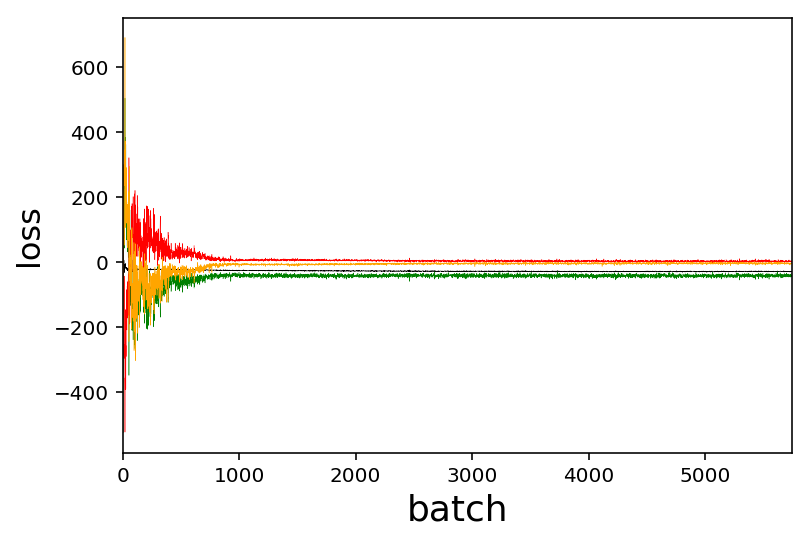

In [28]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, len(gan.d_losses))
# plt.ylim(0, 2)

plt.show()
